__лабораторная работа N1:__  базовые методы машинного обучения

__цель:__ изучить возможности "классических" методов машинного обучения    
      на примере инструментов библиотеки scikit-learn

__порядок выполнения:__ для каждой задачи (классификация, регрессия, кластеризация)      
    получить/сгенерировать данные и применить к ним соответствующий задаче метод,   
    к результатам модели применить методы оценки  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Данные

In [2]:
# https://archive.ics.uci.edu
# https://www.openml.org/search?type=data

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

X = load_iris().data
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Обработка данных

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Оценка классификатора

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Классификация

## Метрический  подход

In [5]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = int(len(X_train)**0.5)

clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [6]:
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [7]:
pred = clf_knn.predict(X_test)
pred

array([0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 1, 1, 1, 1])

In [8]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



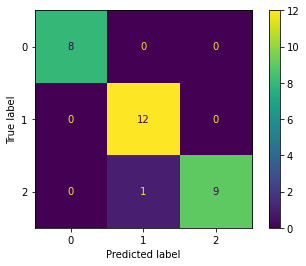

In [9]:
plot_confusion_matrix(clf_knn, X_test, y_test)

fpr, tpr, thresholds = roc_curve( y_test, pred[:,1] )
roc_auc = auc(fpr,tpr)

plt.figure()
plt.grid(True)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Статистический подход

In [10]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
pred = clf_gnb.predict(X_test)
pred

array([0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 1, 1, 1, 1])

In [11]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



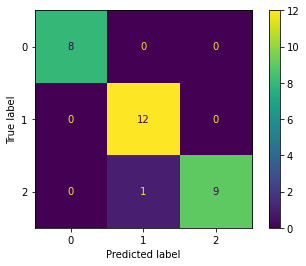

In [12]:
plot_confusion_matrix(clf_gnb, X_test, y_test)

## Логический подход

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
pred = clf_dt.predict(X_test)
pred

array([0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 1, 1, 1, 1])

In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



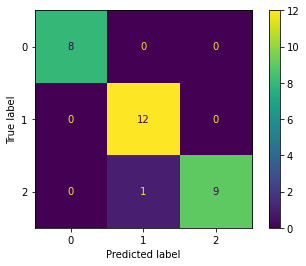

In [15]:
plot_confusion_matrix(clf_dt, X_test, y_test)

## Линейный подход

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train, y_train)
pred = clf_svm.predict(X_test)
pred

array([0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 1, 1, 1, 1])

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



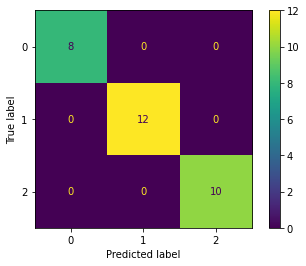

In [18]:
plot_confusion_matrix(clf_svm, X_test, y_test)

## Композиции

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

clf_abc = AdaBoostClassifier()
clf_abc.fit(X_train, y_train)
pred = clf_abc.predict(X_test)
pred

array([0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 1, 1, 1, 1])

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



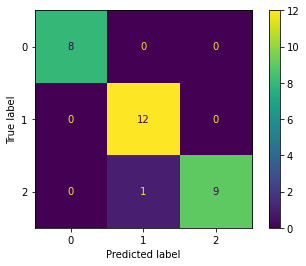

In [21]:
plot_confusion_matrix(clf_abc, X_test, y_test)

## Регрессия

### Оценка регрессии

In [22]:
from sklearn.metrics import mean_squared_error

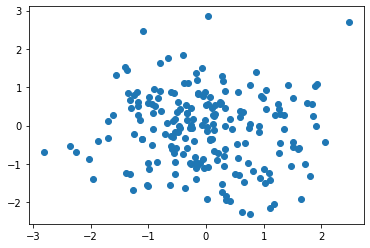

In [23]:
Xr, yr = make_regression(n_samples = 200, n_features = 2)
plt.scatter(x = Xr[:,0], y=Xr[:,1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2)

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

sdgr = SGDRegressor()
sdgr.fit(X_train, y_train)
pred = sdgr.predict(X_test)
pred

array([ -63.83319473,   -0.85629683,  -77.59220616, -134.4401839 ,
        -97.50794932,  -15.72294293, -158.57368228,  -20.58075766,
        160.78072624,  -10.42958472,    4.21167124,   29.36260667,
        -31.25120648,  -85.63889339,   -3.3980811 ,  -44.94961573,
        -23.94849967, -143.09804965,  -27.61997843,  -87.54297714,
         52.89837842,   16.62480348,   24.33300727,   10.17854285,
         31.22260354,  -47.98225379,  -73.92756668,   -5.48607998,
         83.3677821 ,  -81.43087299,   74.67537162,   26.80736833,
        -50.20691263,   43.66998473,   38.07956318,   63.55262743,
         90.2524838 ,  -27.83984365,  -77.18667525,   54.76148221])

In [25]:
mean_squared_error(y_test, pred)

0.0006777692745663273

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred

array([ -63.85504132,   -0.85771236,  -77.62171069, -134.491953  ,
        -97.54513256,  -15.73255273, -158.63617818,  -20.58891144,
        160.84016772,  -10.43728638,    4.21313879,   29.37438097,
        -31.26528248,  -85.67542983,   -3.39732664,  -44.96771134,
        -23.95645342, -143.15445185,  -27.63115251,  -87.57184499,
         52.91354942,   16.6279816 ,   24.33831936,   10.18156924,
         31.22840141,  -48.00161795,  -73.95580516,   -5.48956307,
         83.39441278,  -81.46143524,   74.70546527,   26.81877304,
        -50.22883453,   43.68394349,   38.09232821,   63.57535498,
         90.28193675,  -27.85152739,  -77.21662428,   54.78163392])

In [27]:
mean_squared_error(y_test, pred)

2.1498555079052066e-28

## Кластеризация

### Оценка кластеризации

In [28]:
from sklearn.metrics import silhouette_score

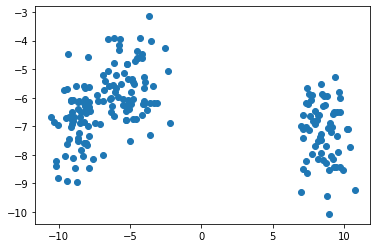

In [29]:
Xc, yc = make_blobs(centers = 3, n_samples = 200)

plt.scatter(x = Xc[:,0], y = Xc[:,1])
plt.show()

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

clustering = DBSCAN(eps=2, min_samples=2).fit(Xc)
cluster = clustering.labels_

len(set(cluster))

2

In [31]:
silhouette_score(Xc,cluster)

0.8309670000446556

In [32]:
clustering = KMeans(n_clusters = 3).fit(Xc)
cluster = clustering.labels_

In [33]:
silhouette_score(Xc,cluster)

0.6609584480853888